In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from key import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress



In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


coordinates = list(lat_lngs)

from citipy import citipy



In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
city_url = url + "&q=Bluff"

city_weather = requests.get(city_url).json()

city_weather

{'coord': {'lon': 168.3333, 'lat': -46.6},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 59.81,
  'feels_like': 59.63,
  'temp_min': 59.81,
  'temp_max': 59.81,
  'pressure': 1005,
  'humidity': 88,
  'sea_level': 1005,
  'grnd_level': 1002},
 'visibility': 10000,
 'wind': {'speed': 7.94, 'deg': 39, 'gust': 13.42},
 'clouds': {'all': 75},
 'dt': 1646930940,
 'sys': {'type': 2,
  'id': 2008959,
  'country': 'NZ',
  'sunrise': 1646937329,
  'sunset': 1646983105},
 'timezone': 46800,
 'id': 2206939,
 'name': 'Bluff',
 'cod': 200}

In [7]:
#Create an empty list to hold the weather data
city_data= []
#Print the beginning of the logginh
print("Beggining Data Retrieval.       ")
print("--------------------------------")

#Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beggining Data Retrieval.       
--------------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | camocim
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | bundaberg
Processing Record 17 of Set 1 | esik
Processing Record 18 of Set 1 | lolua
City not found. Skipping...
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | mataura
Processing 

Processing Record 39 of Set 4 | bastia
Processing Record 40 of Set 4 | dalbandin
Processing Record 41 of Set 4 | sarh
Processing Record 42 of Set 4 | berlevag
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | tiznit
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | temaraia
City not found. Skipping...
Processing Record 49 of Set 4 | kushiro
Processing Record 50 of Set 4 | paita
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | tessalit
Processing Record 4 of Set 5 | comodoro rivadavia
Processing Record 5 of Set 5 | dod ballapur
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | vallenar
Processing Record 8 of Set 5 | lukovetskiy
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | baker city
P

Processing Record 30 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | mahajanga
Processing Record 33 of Set 8 | pervomayskiy
Processing Record 34 of Set 8 | nishihara
Processing Record 35 of Set 8 | lavrentiya
Processing Record 36 of Set 8 | gueret
Processing Record 37 of Set 8 | abu zabad
Processing Record 38 of Set 8 | prince rupert
Processing Record 39 of Set 8 | vreed en hoop
City not found. Skipping...
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | qianan
Processing Record 42 of Set 8 | ifakara
Processing Record 43 of Set 8 | lampa
Processing Record 44 of Set 8 | zhongshu
Processing Record 45 of Set 8 | krasnyy chikoy
Processing Record 46 of Set 8 | wanning
Processing Record 47 of Set 8 | shepsi
Processing Record 48 of Set 8 | benton harbor
Processing Record 49 of Set 8 | marolambo
Processing Record 50 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 9 | 

Processing Record 12 of Set 12 | liberia
Processing Record 13 of Set 12 | egvekinot
Processing Record 14 of Set 12 | oktyabrskiy
Processing Record 15 of Set 12 | nyeri
Processing Record 16 of Set 12 | la ronge
Processing Record 17 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 18 of Set 12 | wahpeton
Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | numan
Processing Record 21 of Set 12 | along
Processing Record 22 of Set 12 | asosa
Processing Record 23 of Set 12 | auki
Processing Record 24 of Set 12 | houma
Processing Record 25 of Set 12 | labuhan
Processing Record 26 of Set 12 | noumea
Processing Record 27 of Set 12 | sussex
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | batemans bay
Processing Record 30 of Set 12 | muros
Processing Record 31 of Set 12 | okato
Processing Record 32 of Set 12 | tateyama
Processing Record 33 of Set 12 | forio
Processing Record 34 of Set 12 | muncar
Processing Record 35 of Set 12 | ball

In [29]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-19.55,99,59,2.42,RU,2022-03-10 03:21:20
1,Ushuaia,-54.8000,-68.3000,47.86,71,75,14.97,AR,2022-03-10 03:18:05
2,Bluff,-46.6000,168.3333,71.80,80,100,10.09,NZ,2022-03-10 03:21:21
3,Severo-Kurilsk,50.6789,156.1250,30.40,93,100,16.84,RU,2022-03-10 03:21:21
4,Cape Town,-33.9258,18.4232,66.61,82,0,17.27,ZA,2022-03-10 03:19:28
5,Camocim,-2.9022,-40.8411,77.14,90,99,8.30,BR,2022-03-10 03:21:22
6,Port Macquarie,-31.4333,152.9167,73.36,64,48,13.04,AU,2022-03-10 03:18:04
7,Kudahuvadhoo,2.6708,72.8944,81.52,67,10,3.56,MV,2022-03-10 03:21:23
8,Punta Arenas,-53.1500,-70.9167,48.31,87,75,6.91,CL,2022-03-10 03:21:23
9,Port Alfred,-33.5906,26.8910,71.37,85,12,21.99,ZA,2022-03-10 03:21:24


In [9]:
column_name = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [column_name]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-03-10 03:21:20,71.9167,114.0833,-19.55,99,59,2.42
1,Ushuaia,AR,2022-03-10 03:18:05,-54.8000,-68.3000,47.86,71,75,14.97
2,Bluff,NZ,2022-03-10 03:21:21,-46.6000,168.3333,71.80,80,100,10.09
3,Severo-Kurilsk,RU,2022-03-10 03:21:21,50.6789,156.1250,30.40,93,100,16.84
4,Cape Town,ZA,2022-03-10 03:19:28,-33.9258,18.4232,66.61,82,0,17.27
...,...,...,...,...,...,...,...,...,...
551,Diapaga,BF,2022-03-10 03:38:06,12.0708,1.7889,79.56,11,10,7.31
552,Gazli,UZ,2022-03-10 03:38:07,40.1333,63.4500,52.95,59,100,16.31
553,Andilamena,MG,2022-03-10 03:38:07,-17.0167,48.5833,68.23,96,100,2.77
554,Poum,NC,2022-03-10 03:38:08,-20.2333,164.0167,82.26,72,23,14.20


In [10]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lngs = city_data_df["Lng"]


In [12]:
today = time.strftime("%x")
today

'03/09/22'

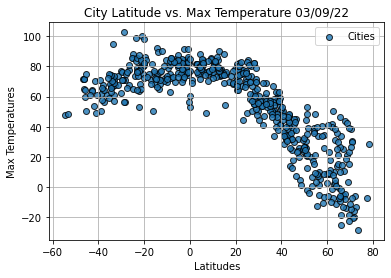

In [13]:
plt.scatter(lats, max_temps, edgecolor ="black", marker = "o", alpha=0.8, label="Cities")
plt.grid()
plt.legend()

plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Max Temperatures")
plt.savefig("weather_data/Fig.png")
plt.show()

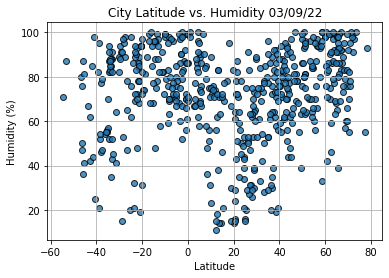

In [14]:
plt.scatter(lats, humidity, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


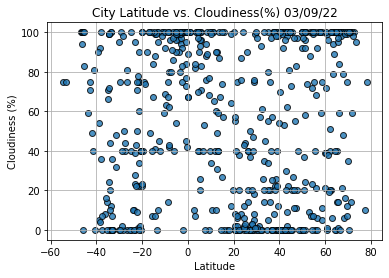

In [15]:
plt.scatter(lats, cloudiness, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

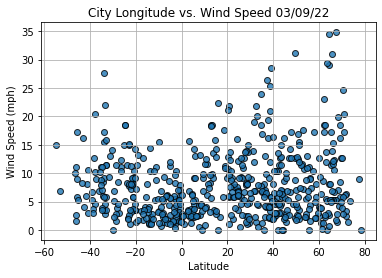

In [16]:
plt.scatter(lats, wind_speed, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Longitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

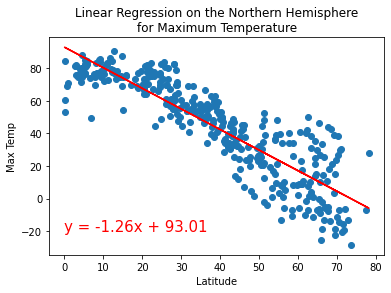

In [19]:


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'
                        '\nfor Maximum Temperature', 'Max Temp',(0,-20))


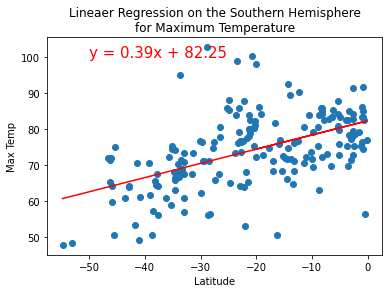

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Lineaer Regression on the Southern Hemisphere'
                                            '\nfor Maximum Temperature', 'Max Temp', (-50, 100))

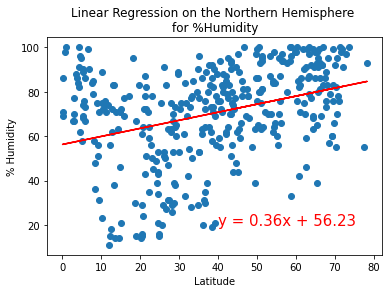

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n" 
                       'for %Humidity', '% Humidity', (40,20))

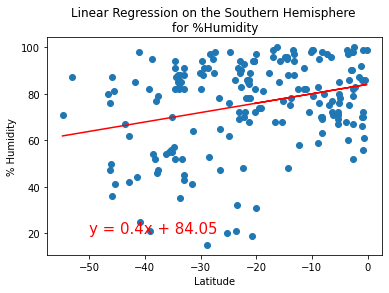

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n" 
                       'for %Humidity', '% Humidity', (-50,20))

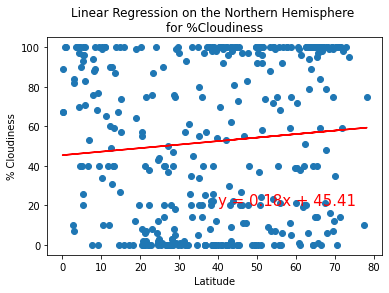

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n" 
                       'for %Cloudiness', '% Cloudiness', (40,20))

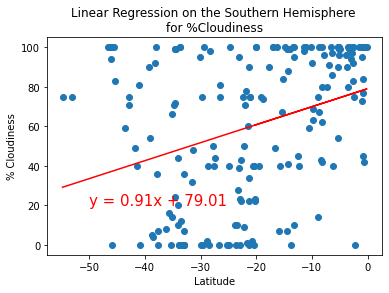

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n" 
                       'for %Cloudiness', '% Cloudiness', (-50,20))

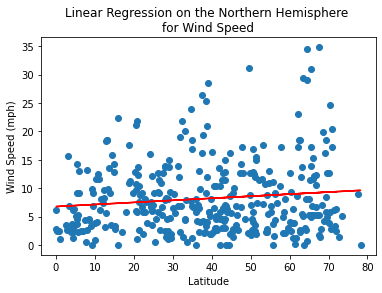

In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n" 
                       'for Wind Speed', 'Wind Speed (mph)', (40,40))

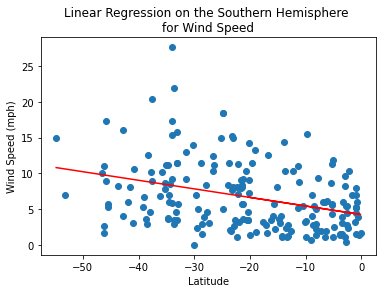

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n" 
                       'for Wind Speed', 'Wind Speed (mph)', (-50,30))